### Задача создать отчет о сумме заработанных денег по продуктам из документа 

    ниже будет:
    -проверка пустых значений
    -смена типа данных колонок
    -редактирование названий колонок
    -группировка и аггрегация суммы по продуктам
    -проверка полученных значений с исходными и экспорт

#### Описание данных:

   **Номер** - уникальный номер транзакции 
   
   **Дата создания** - дата и время создания заказа  
   
   **Дата оплаты** -  дата и время оплаты
   
   **Title** - Название продукта(курса)
   
   **Статус** - статус заказа 
   
   **Заработано** - количество денег поступивших с заказа
   
   **Город** - город оплаты
   
   **Платежная система** - система через которую была произведена оплата
    
   

In [24]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('/Users/v.obrosova/Documents/СТАТИСТИКА/csv/lesson_1_data.csv', encoding='windows-1251',sep= ';')

#### Взглянем на данные, присутствуют пустые значения NaN, 
проверим чтобы пустые значения даты оплаты соответствовали только тем заказам где статус не "Завершен", иначем наши расчеты о сумме дохода оплаченных продуктов будут неверны


In [3]:
df.head()

,Номер,Дата создания,Дата оплаты,Title,Статус,Заработано,Город,Платежная система
0,1062823,01.12.2019 10:50,01.12.2019 10:52,Курс обучения «Эксперт»,Завершен,29597.5,Чита,Сбербанк эквайринг
1,1062855,01.12.2019 20:53,01.12.2019 21:27,Курс обучения «Эксперт»,Завершен,17450.3,Краснодар,Яндекс.Касса
2,1062856,01.12.2019 21:43,NaN,Курс обучения «Специалист»,Отменен,0.0,NaN,NaN
3,1062880,03.12.2019 0:18,NaN,Курс обучения «Консультант»,Отменен,0.0,г.Москва и Московская область,NaN
4,1062899,03.12.2019 21:43,NaN,Курс обучения «Эксперт»,Отменен,0.0,г.Москва и Московская область,NaN


In [4]:
df.isna().sum()

Номер                  0
Дата создания          0
Дата оплаты          112
Title                  0
Статус                 0
Заработано             0
Город                 13
Платежная система    110
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.Статус.value_counts()

Завершен            180
Отменен             108
Частично оплачен      2
Ожидаем оплаты        1
В работе              1
Name: Статус, dtype: int64

In [7]:
df.query('Статус == "Завершен"').isna().sum()

Номер                0
Дата создания        0
Дата оплаты          0
Title                0
Статус               0
Заработано           0
Город                4
Платежная система    0
dtype: int64

#### из 112 пропущенных значений в колонке даты оплаты, все приходяться на все статусы кроме "Завершен"

In [8]:
df.shape

(292, 8)

In [9]:
df.dtypes

Номер                  int64
Дата создания         object
Дата оплаты           object
Title                 object
Статус                object
Заработано           float64
Город                 object
Платежная система     object
dtype: object

#### колонки с датами переведем в формат даты , но перед этим редактируем названия колонок для удобства работы

In [10]:
df.columns = df.columns.str.replace(' ','_')
df.head()

,Номер,Дата_создания,Дата_оплаты,Title,Статус,Заработано,Город,Платежная_система
0,1062823,01.12.2019 10:50,01.12.2019 10:52,Курс обучения «Эксперт»,Завершен,29597.5,Чита,Сбербанк эквайринг
1,1062855,01.12.2019 20:53,01.12.2019 21:27,Курс обучения «Эксперт»,Завершен,17450.3,Краснодар,Яндекс.Касса
2,1062856,01.12.2019 21:43,NaN,Курс обучения «Специалист»,Отменен,0.0,NaN,NaN
3,1062880,03.12.2019 0:18,NaN,Курс обучения «Консультант»,Отменен,0.0,г.Москва и Московская область,NaN
4,1062899,03.12.2019 21:43,NaN,Курс обучения «Эксперт»,Отменен,0.0,г.Москва и Московская область,NaN


In [11]:
df['Дата_создания'] = df['Дата_создания'].astype('datetime64')
df['Дата_оплаты'] = df['Дата_оплаты'].astype('datetime64')

In [12]:
df.dtypes

Номер                         int64
Дата_создания        datetime64[ns]
Дата_оплаты          datetime64[ns]
Title                        object
Статус                       object
Заработано                  float64
Город                        object
Платежная_система            object
dtype: object

In [13]:
df = df.rename(columns = {'Номер':'nomber',\
                          'Дата_создания':'date create',\
                          'Дата_оплаты':'date pay',\
                          'Статус':'status',\
                          'Заработано':'earned',\
                          'Город':'city',\
                          'Платежная_система':'payment_system'})
df.head()

,nomber,date create,date pay,Title,status,earned,city,payment_system
0,1062823,2019-01-12 10:50:00,2019-01-12 10:52:00,Курс обучения «Эксперт»,Завершен,29597.5,Чита,Сбербанк эквайринг
1,1062855,2019-01-12 20:53:00,2019-01-12 21:27:00,Курс обучения «Эксперт»,Завершен,17450.3,Краснодар,Яндекс.Касса
2,1062856,2019-01-12 21:43:00,NaT,Курс обучения «Специалист»,Отменен,0.0,NaN,NaN
3,1062880,2019-03-12 00:18:00,NaT,Курс обучения «Консультант»,Отменен,0.0,г.Москва и Московская область,NaN
4,1062899,2019-03-12 21:43:00,NaT,Курс обучения «Эксперт»,Отменен,0.0,г.Москва и Московская область,NaN


#### Теперь просуммируем все заработнные деньги по каждому продукту

In [14]:
all_money = df.earned.sum() 
all_money

992103.5900000001

In [15]:
money_tittle = df.query("status == 'Завершен'")\
                 .groupby('Title', as_index = False)\
                 .aggregate({'earned':'sum','nomber':'count'})\
                 .rename(columns={'nomber':'quantity'})\
                 .sort_values('earned', ascending = False)
money_tittle

,Title,earned,quantity
5,Подписка «ОНЛАЙН ДИЕТОЛОГ» с ежемесячным автос...,366947.20,125
0,Курс обучения «Консультант»,208163.49,31
1,Курс обучения «Специалист»,160862.64,7
2,Курс обучения «Эксперт»,148992.80,5
4,Курс от Школы Диетологов. Повышение квалификац...,88384.92,9
3,Курс от Школы Диетологов. Бизнес,18752.54,3


####  Сверим получившееся данные c исходными и сохраним файл:

    1.Сравним число продуктов
    2.Сравним сумму денег

In [16]:
df.Title.nunique()

6

In [17]:
money_tittle.Title.nunique()

6

In [18]:
df.head()

,nomber,date create,date pay,Title,status,earned,city,payment_system
0,1062823,2019-01-12 10:50:00,2019-01-12 10:52:00,Курс обучения «Эксперт»,Завершен,29597.5,Чита,Сбербанк эквайринг
1,1062855,2019-01-12 20:53:00,2019-01-12 21:27:00,Курс обучения «Эксперт»,Завершен,17450.3,Краснодар,Яндекс.Касса
2,1062856,2019-01-12 21:43:00,NaT,Курс обучения «Специалист»,Отменен,0.0,NaN,NaN
3,1062880,2019-03-12 00:18:00,NaT,Курс обучения «Консультант»,Отменен,0.0,г.Москва и Московская область,NaN
4,1062899,2019-03-12 21:43:00,NaT,Курс обучения «Эксперт»,Отменен,0.0,г.Москва и Московская область,NaN


#### Визуализируем заработока по каждому курсу 

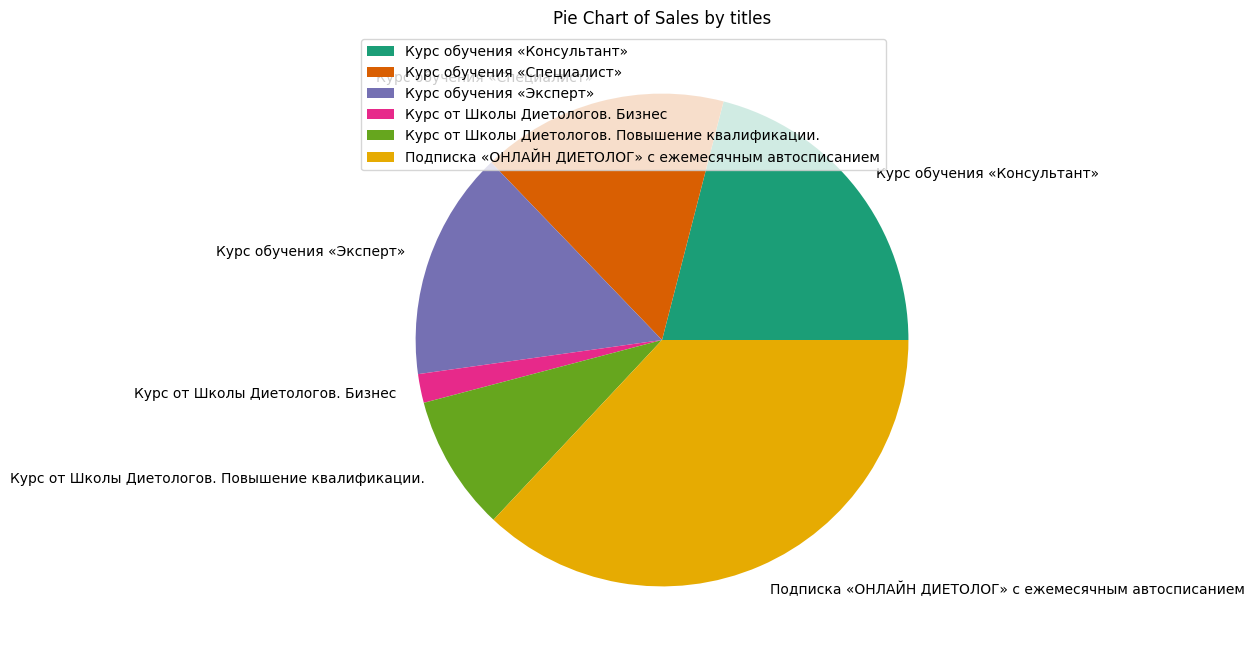

In [42]:
pie = money_tittle.groupby('Title').agg({'earned':'sum'})

pie.plot(kind='pie', subplots=True, figsize=(8, 8), colors=plt.cm.Dark2.colors)
plt.title("Pie Chart of Sales by titles")
plt.ylabel("")
plt.legend(loc='upper left')

plt.show()

#### Сохраним файл под названием сегодняшней даты 

In [95]:
today_day = datetime.today().strftime('%Y - %m - %d')
file_name = 'money_tittle_{}.csv'
file_name = file_name.format(today_day)

In [97]:
if int(money_tittle.earned.sum()) == int(df.earned.sum()):
    print('Ok File {} is written'.format(file_name))
    money_tittle.to_csv(file_name, index = False)
else:
    print('Error!')

Ok File money_tittle_2022 - 11 - 30.csv is written
